### Bagged Trees

Using Bagged Tree is Better than using Single Decision Tree

Protects Individual Decision Tree from **Overfitting**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor

### Dataset

In [2]:
df = pd.read_csv('../Data/KingCountryHousePrice.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Selecting Important Features for Better Understanding.

In [3]:
features = ['bedrooms','bathrooms', 'sqft_living','sqft_lot','floors']
X = df.loc[:, features]
y = df.loc[:, 'price'].values

### Splitting the Data into Train Set and Test Set

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)    

### Bagged Tree

No Need to Standardize Features.

In [5]:
model = BaggingRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

BaggingRegressor(n_estimators=100, random_state=0)

### Prediction on One Observation

In [6]:
print(f'Prediction on One Observation : {model.predict(X_test.iloc[0].values.reshape(1,-1))}')

Prediction on One Observation : [353334.6]


### Prediction for Multiple Observations

In [7]:
print(f'Predictions : {model.predict(X_test[0:10])}')

Predictions : [ 353334.6  1011004.77  450212.76  418593.    772871.7   405436.5
  361353.02  720323.9   580438.82 1623570.8 ]


### Measuring Model Performance

In [8]:
score = model.score(X_test, y_test)
print(f'Score : {score*100:.2f}%')

Score : 57.86%


### Tuning n_estimators ( Number of Decision Trees )

In [9]:
estimator_range = [1] + list(range(10,150,20))
score = []
for estimator in estimator_range:
    model = BaggingRegressor(n_estimators=estimator, random_state=0)
    model.fit(X_train, y_train)
    score.append(model.score(X_test, y_test))

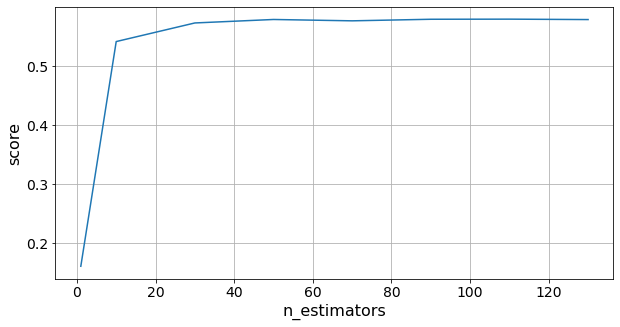

In [10]:
plt.figure(figsize=(10,5))
plt.plot(estimator_range, score)
plt.xlabel('n_estimators', fontsize=16)
plt.ylabel('score', fontsize=16)
plt.tick_params(labelsize=14)
plt.grid();

Score stops Improving after Certain Number of Estimators ( Decision Trees )

One Way to get Better Score is Add some more Relevant Features. 